In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
%matplotlib inline


In [106]:
df = pd.read_csv("Churn_Modelling.csv")
df.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
8613,8614,15577018,Tsao,684,Germany,Female,26,2,114035.39,1,0,0,96885.19,0
7513,7514,15632275,Trevisano,718,France,Male,29,2,0.00,1,1,0,126336.72,0
6350,6351,15799600,Coles,640,Germany,Male,48,1,111599.32,1,0,1,135995.58,0
7822,7823,15761018,Tan,581,Germany,Male,50,2,143829.20,2,1,0,181224.24,1
8875,8876,15768120,Brown,702,Germany,Male,36,9,90560.48,2,1,0,174268.87,0


In [107]:
#Drop those two cause we dont need them
df.drop(['RowNumber','CustomerId'],inplace = True ,axis= "columns")



In [108]:
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()} {len(df[column].unique())}') 

print_unique_col_values(df)

Surname: ['Hargrave' 'Hill' 'Onio' ... 'Kashiwagi' 'Aldridge' 'Burbidge'] 2932
Geography: ['France' 'Spain' 'Germany'] 3
Gender: ['Female' 'Male'] 2


In [109]:
# Drop the column:  surname cause we dont need it and has 3000 unique values
df.drop(['Surname'],inplace = True ,axis= "columns")
print_unique_col_values(df)

Geography: ['France' 'Spain' 'Germany'] 3
Gender: ['Female' 'Male'] 2


Encode the Gender into 0 and 1 , and encode Geography by using ONE HOT ENCODING method

In [110]:
df['Gender'].replace({'Female':0,'Male':1},inplace = True)


/var/folders/r_/qgb01fl924sb6q7rw1vvs2w40000gn/T/ipykernel_47931/3596891307.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].replace({'Female':0,'Male':1},inplace = True)
/var/folders/r_/qgb01fl924sb6q7rw1vvs2w40000gn/T/ipykernel_47931/3596891307.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcast

In [111]:
df1 = pd.get_dummies(data=df,columns=['Geography'],dtype=int)
df1.sample(5)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
6567,662,0,54,1,187997.15,1,0,0,111442.71,1,0,0,1
1346,643,1,30,5,94443.77,1,1,1,165614.40,0,1,0,0
8367,499,1,60,7,76961.60,2,1,1,83643.87,0,1,0,0
7106,646,1,40,5,93680.43,2,1,1,179473.26,0,1,0,0
2541,611,0,61,3,131583.59,4,0,1,66238.23,1,1,0,0


Visualize some important features

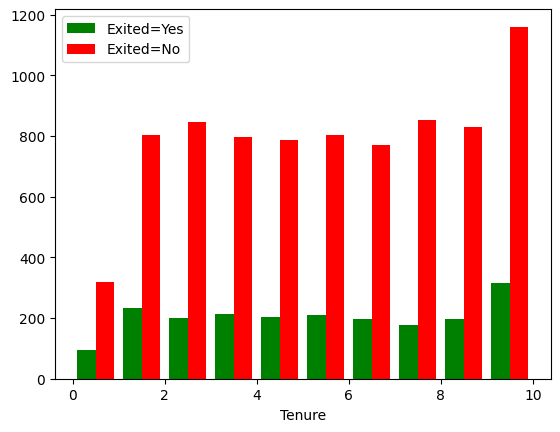

In [112]:
tenure_yes = df1[df1.Exited == 1].Tenure
tenure_now = df1[df1.Exited == 0].Tenure
plt.xlabel('Tenure')
plt.hist([tenure_yes,tenure_now],color = ['green','red'],label=['Exited=Yes','Exited=No'])
plt.legend()
# For worker of 10 years:  1200 want to quit and 380 want to stay(Exited)

In [113]:
salary_exited = df1[df1.Exited == 1].EstimatedSalary
salary_NotExited = df1[df1.Exited == 0].EstimatedSalary


salary_NotExited.sample(5)

7963     82647.65
9932    114858.90
1307     10023.15
9345    116944.30
3424    197602.29
Name: EstimatedSalary, dtype: float64

In [114]:
salary_exited.sample(5)

1534    164038.07
8349     31257.10
4302     69228.20
1987     55725.04
617     193437.89
Name: EstimatedSalary, dtype: float64

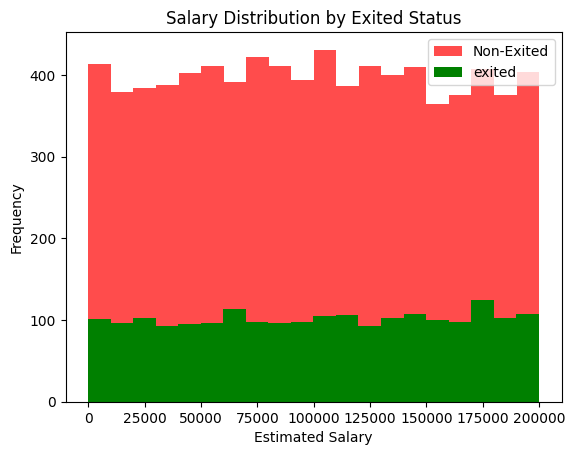

In [115]:

plt.hist(salary_NotExited, bins=20, color="red",alpha=0.7, label="Non-Exited")
plt.hist(salary_exited,bins=20,color='green',label='exited')

plt.xlabel("Estimated Salary")
plt.ylabel("Frequency")
plt.title("Salary Distribution by Exited Status")
plt.legend()
plt.show()



In [116]:
# Check the unique values for every column

for column in df1:
    print(column ,": ", f"{df1[column].unique()}")

CreditScore :  [619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778
 514 525 715 580 807 521 759 516 711 618 643 671 689 620 676 572 695 592
 567 694 547 594 673 610 767 763 712 703 662 659 523 772 545 634 739 771
 681 544 696 766 727 693 557 531 498 651 791 733 811 707 714 782 775 799
 602 744 588 747 583 627 731 629 438 642 806 474 559 429 680 749 734 644
 626 649 805 718 840 630 654 762 568 613 522 737 648 443 640 540 460 593
 801 611 802 745 483 690 492 709 705

Scale the data with sklearn  MinMax

In [117]:
colsToScale = ['CreditScore','Age','Balance','EstimatedSalary']

from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
df1[colsToScale] = scaler.fit_transform(df1[colsToScale])
df1.sample(5)


,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
3330,0.776,1,0.000000,4,0.000000,2,1,1,0.238961,0,1,0,0
4952,0.658,1,0.540541,9,0.435745,1,1,1,0.019090,0,0,0,1
9518,0.470,1,0.351351,7,0.653125,1,1,1,0.561662,0,0,1,0
8263,0.410,1,0.189189,10,0.000000,2,0,1,0.843052,0,0,0,1
5953,0.332,0,0.175676,7,0.000000,1,1,0,0.235058,0,0,0,1


Time to train the data 

In [118]:
x = df1.drop('Exited',axis="columns")
y = df1.Exited

In [119]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=True)

In [120]:
precentage = df1['Exited'].value_counts(normalize=True) * 100
precentage

# we can see that the data isnt logic, but we will train anyway

Exited
0    79.63
1    20.37
Name: proportion, dtype: float64

In [121]:
len(x_train.columns)

12

In [126]:
model = keras.Sequential([
    keras.layers.Dense(10,input_shape=(12,),activation='relu'),
    keras.layers.Dense(8,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)
model.fit(x_train,y_train,epochs=100)

Epoch 1/100


/Users/youneschiad/.pyenv/versions/3.12.3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 394us/step - accuracy: 0.7982 - loss: 0.5139
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step - accuracy: 0.7926 - loss: 0.4943
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step - accuracy: 0.7979 - loss: 0.4704
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step - accuracy: 0.7958 - loss: 0.4712
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step - accuracy: 0.7983 - loss: 0.4649
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step - accuracy: 0.8004 - loss: 0.4535
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step - accuracy: 0.8100 - loss: 0.4466
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step - accuracy: 0.8032 - loss: 0.4519
Epoch 9/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step - accuracy: 0.8144 - loss: 0.4416
Epoch 10/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step - accuracy: 0.8059 - loss: 0.4488
Epoch 11/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step - accuracy: 0.8116 - loss: 0.4366
Epoch 12/100
250/250 ━━━━━━━━━━

In [128]:
model.evaluate(x_test,y_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8306 - loss: 0.3832


[0.36832568049430847, 0.8379999995231628]

In [135]:
y_predicted = model.predict(x_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 482us/step


0.8659999966621399

Visualize the predicted data into heatmap using confusion matrix

In [159]:
y_pred = []

for y in y_predicted:
    if y > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

print(f"Number of predicted  0: {y_pred.count(0)} and the real values: {list(y_test).count(0)}")
print(f"Number of predicted  1: {y_pred.count(1)} and the real values: {list(y_test).count(1)}")

Number of predicted  0: 1805 and the real values: 1585
Number of predicted  1: 195 and the real values: 415


In [160]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.97      0.90      1585
           1       0.73      0.34      0.47       415

    accuracy                           0.84      2000
   macro avg       0.79      0.66      0.69      2000
weighted avg       0.83      0.84      0.81      2000



In [161]:
confusion_matrix = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)


Text(95.72222222222221, 0.5, 'Target')

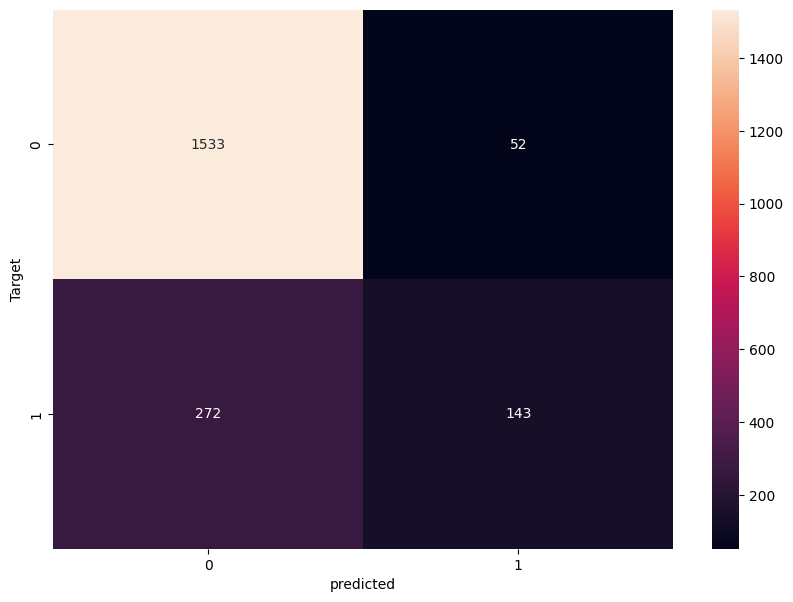

In [171]:
import seaborn as sb
plt.figure(figsize=(10,7))
sb.heatmap(confusion_matrix,annot=True,fmt='d')
plt.xlabel('predicted')
plt.ylabel('Target')

#The diagonal is the number of true predictions for the value 0 then 1
#1533 zeros are true predictions and 272 are false predictions OR 1533 True Negatives and 272 False Negatives
#                                                                 143 True Positives and 52 False Positives

END PREDICTIONS
SALAAAM
